## Import statements

In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from src.env import user, password, CodeUp_sql_server
import os
from src.time_series_acquire import wrangle_store_data as wrangle
import warnings
warnings.filterwarnings("ignore")

# plotting defaults
plt.rc('figure', figsize=(13, 7))
plt.style.use('seaborn-whitegrid')
plt.rc('font', size=16)

# module for fixing imported modules
from importlib import reload

Notice that we still have the same issue we ran into before. If we want to use this method and we don't want to split in the middle of a day, we will need to either algorithmically or manually tweak the split points.

# Exercises
The end result of this exercise should be a file named `prepare.py`.

**Using your store items data:**

- Convert date column to datetime format.
- Plot the distribution of sale_amount and item_price.
- Set the index to be the datetime variable.
- Add a 'month' and 'day of week' column to your dataframe.
- Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

**Using OPS data (hint: if you don't know how to acquire this data, do a bit of google searching on how to do this with pandas):**
- Acquire the Open Power Systems Data for Germany, which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. You can get the data here: https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv
- Convert date column to datetime format.
- Plot the distribution of each of your variables.
- Set the index to be the datetime variable.
- Add a month and a year column to your dataframe.
- Fill any missing values.
- Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [17]:
def set_index(df, index_variable):
    try:
        df[index_variable] = pd.to_datetime(df[index_variable])
    except ValueError as e:
        print('ValueError', e)
    df = df.set_index(index_variable).sort_index() 
    
    return df

In [66]:
df = wrangle()

In [67]:
df['sale_date'] = pd.to_datetime(df['sale_date'])

In [68]:
df = df.set_index(index_variable).sort_index() 

In [57]:
df = set_index(df, 'sale_date')

In [41]:
df.columns.to_list()

['store_id',
 'item_id',
 'item_upc14',
 'item_upc12',
 'item_brand',
 'item_name',
 'item_price',
 'sale_id',
 'sale_amount',
 'store_address',
 'store_zipcode',
 'store_city',
 'store_state']

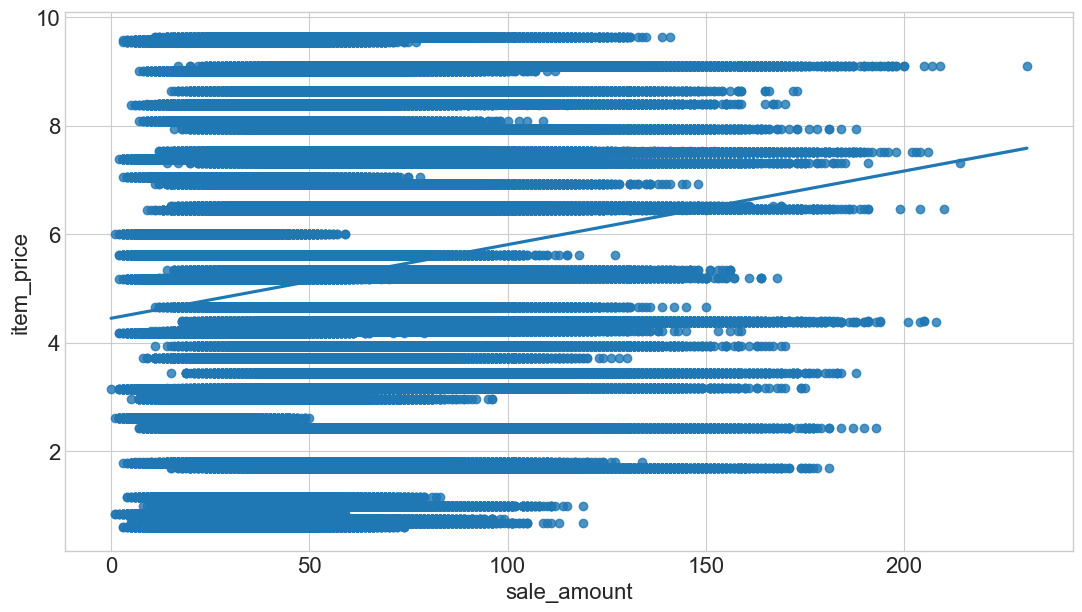

In [48]:
sns.regplot(data=df, x ='sale_amount', y='item_price')
plt.show()

<AxesSubplot:xlabel='sale_amount', ylabel='Count'>

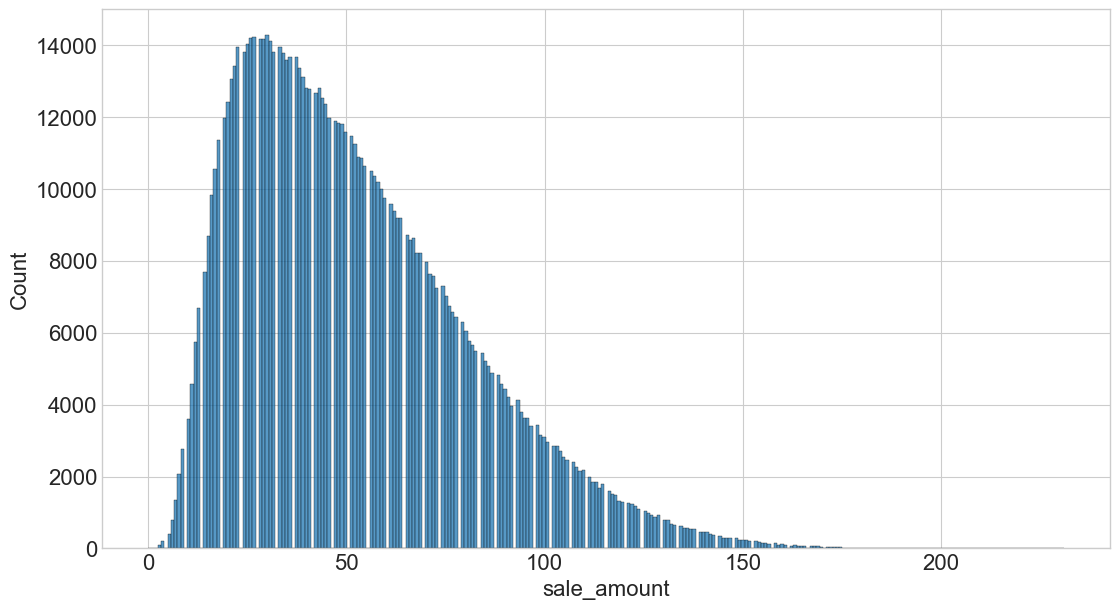

In [50]:
sns.histplot(data=df, x= 'sale_amount')

Text(0.5, 1.0, 'item_price')

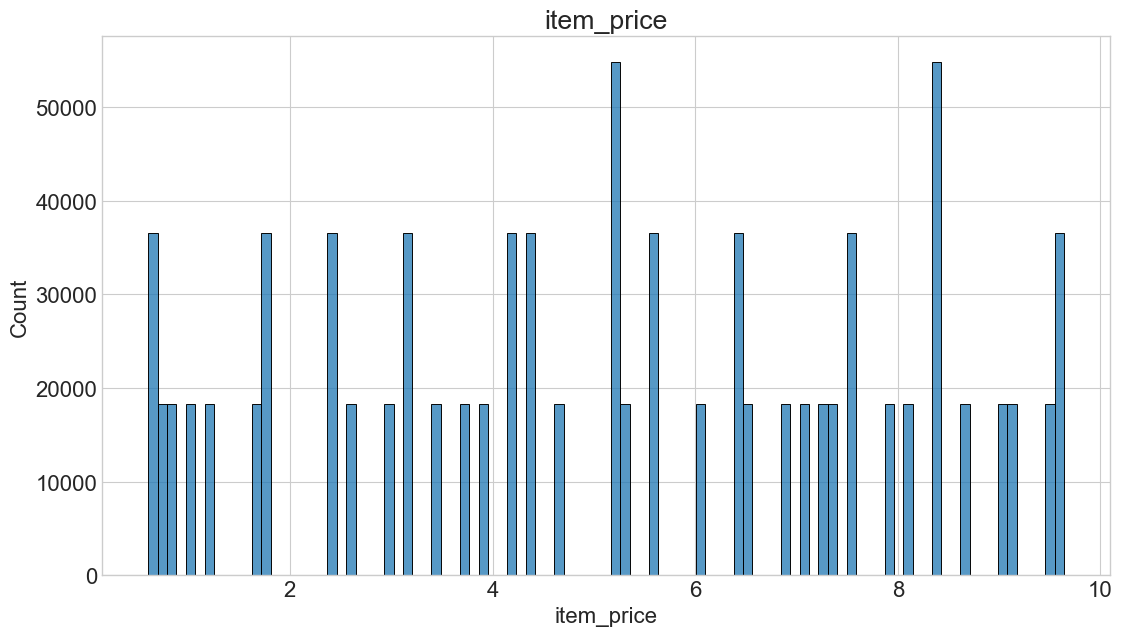

In [54]:
sns.histplot(data=df, x='item_price')
plt.title(f'item_price')

4. Add a 'month' and 'day of week' column to your dataframe.

In [71]:
df['month'] = df.index.month_name()
df['day_of_week'] = df.index.day_name()

In [72]:
df.head()

,store_id,item_id,item_upc14,item_upc12,item_brand,item_name,item_price,sale_id,sale_amount,store_address,store_zipcode,store_city,store_state,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01,1,1,35200264013,35200264013,Riceland,Riceland American Jazmine Rice,0.84,1,13,12125 Alamo Ranch Pkwy,78253,San Antonio,TX,January,Tuesday
2013-01-01,3,17,88313590791,88313590791,Ducal,Ducal Refried Red Beans,1.16,295813,26,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday
2013-01-01,10,7,70177154004,70177154004,Twinings Of London,Twinings Of London Classics Lady Grey Tea - 20 Ct,9.64,125995,32,8503 NW Military Hwy,78231,San Antonio,TX,January,Tuesday
2013-01-01,3,18,21200725340,21200725340,Scotch,Scotch Removable Clear Mounting Squares - 35 Ct,4.39,314073,45,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday
2013-01-01,3,19,41520035646,41520035646,Careone,Careone Family Comb Set - 8 Ct,0.74,332333,34,2118 Fredericksburg Rdj,78201,San Antonio,TX,January,Tuesday


5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [74]:
#last_sale = df.reset_index().groupby(['store_id','item_id']).sale_date.max()

df.groupby(['store_id','item_id'])

6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.

In [73]:
def set_index(df, index_variable):
    try:
        df[index_variable] = pd.to_datetime(df[index_variable])
    except ValueError as e:
        print('ValueError', e)
    df = df.set_index(index_variable).sort_index() 
    
    return df

## German Power